# Libraries

In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
 #load tha dataset
df=pd.read_csv('Uber-Jan-Feb-FOIL.csv')
df


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


# Data Handling and Data Cleaning

In [3]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [4]:
#Shape
df.shape

(354, 4)

In [5]:
#description about dataset
df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [6]:
#top 5 uber data
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [7]:
#bottom 5 uber data
df.tail()

,dispatching_base_number,date,active_vehicles,trips
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803
353,B02765,2/28/2015,747,7753


In [8]:
#count the row in each column
df.count()

dispatching_base_number    354
date                       354
active_vehicles            354
trips                      354
dtype: int64

In [9]:
#minimum value for each column
df.min()


dispatching_base_number      B02512
date                       1/1/2015
active_vehicles                 112
trips                           629
dtype: object

#standard deviation of data
df.std

In [11]:
#check the null values
df.isnull().sum()

dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64

In [12]:
#check duplicated values
df.duplicated().sum()

0

In [13]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])



# Identification and removal of Outliers using IQR method


<Axes: >

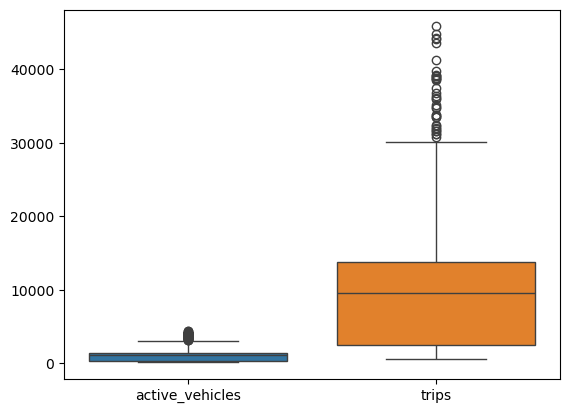

In [15]:
sns.boxplot(df)

C:\Users\Chetanya Kumar\AppData\Local\Temp\ipykernel_392\211519354.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='active_vehicles', palette='Blues', ax=axes[0])
C:\Users\Chetanya Kumar\AppData\Local\Temp\ipykernel_392\211519354.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='trips', palette='husl', ax=axes[1])


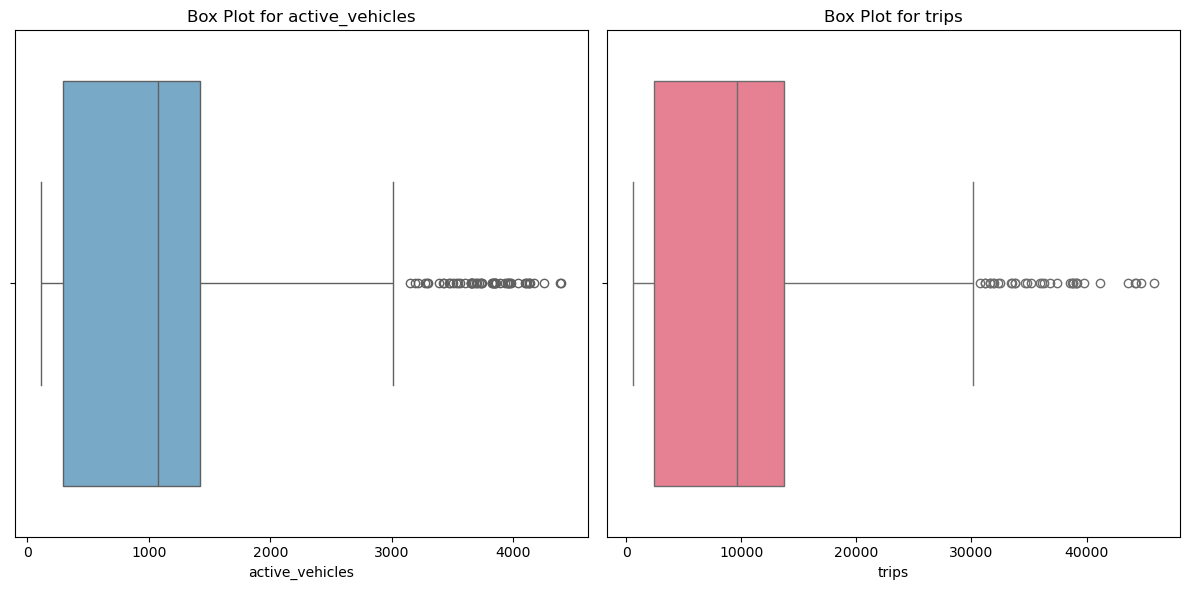

In [16]:
#Box plot for each column 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Box plot for active_vehicles
sns.boxplot(data=df, x='active_vehicles', palette='Blues', ax=axes[0])
axes[0].set_title('Box Plot for active_vehicles')

# Box plot for trips
sns.boxplot(data=df, x='trips', palette='husl', ax=axes[1])
axes[1].set_title('Box Plot for trips')

plt.tight_layout()
plt.show()

In [17]:
#remove the outlier from active_vehicles
Q1 = df['active_vehicles'].quantile(0.25)
Q3 = df['active_vehicles'].quantile(0.75)
IQR = Q3-Q1
threshold=1.5 
admit_outliers=df[(df['active_vehicles'] <Q1-threshold*IQR) | (df['active_vehicles'] > Q3+ threshold*IQR)]
admit_outliers

,dispatching_base_number,date,active_vehicles,trips
2,B02764,2015-01-01,3427,29421
11,B02764,2015-01-02,3147,19974
17,B02764,2015-01-03,3215,29729
27,B02764,2015-01-05,3387,20926
30,B02764,2015-01-06,3473,25301
38,B02764,2015-01-07,3603,29949
46,B02764,2015-01-08,3831,33802
50,B02764,2015-01-09,3820,33517
58,B02764,2015-01-10,3558,38864
63,B02764,2015-01-11,3186,27681


<Axes: xlabel='active_vehicles'>

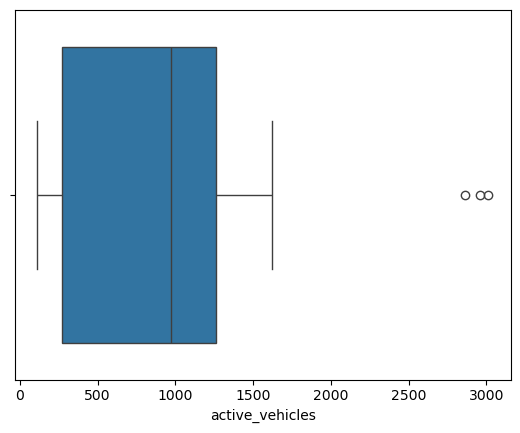

In [18]:
df=df.drop(admit_outliers.index)
sns.boxplot(x='active_vehicles',data=df)

In [19]:
#remove the outlier from active_vehicles
Q1 = df['trips'].quantile(0.25)
Q3 = df['trips'].quantile(0.75)
IQR = Q3-Q1
threshold=1.5 
admit_outliers=df[(df['trips'] <Q1-threshold*IQR) | (df['trips'] > Q3+ threshold*IQR)]
admit_outliers

,dispatching_base_number,date,active_vehicles,trips


<Axes: xlabel='trips'>

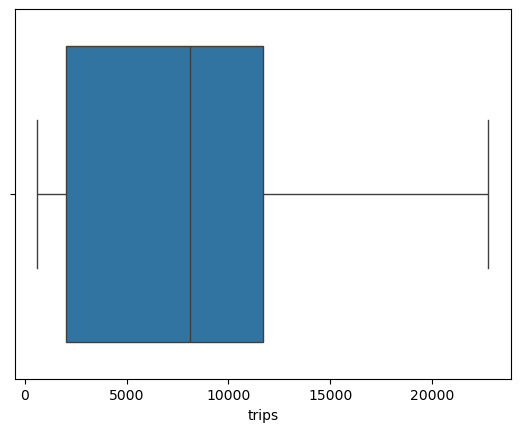

In [20]:
df=df.drop(admit_outliers.index)
sns.boxplot(x='trips',data=df)

# Exploratory Data Visualization (EDA)

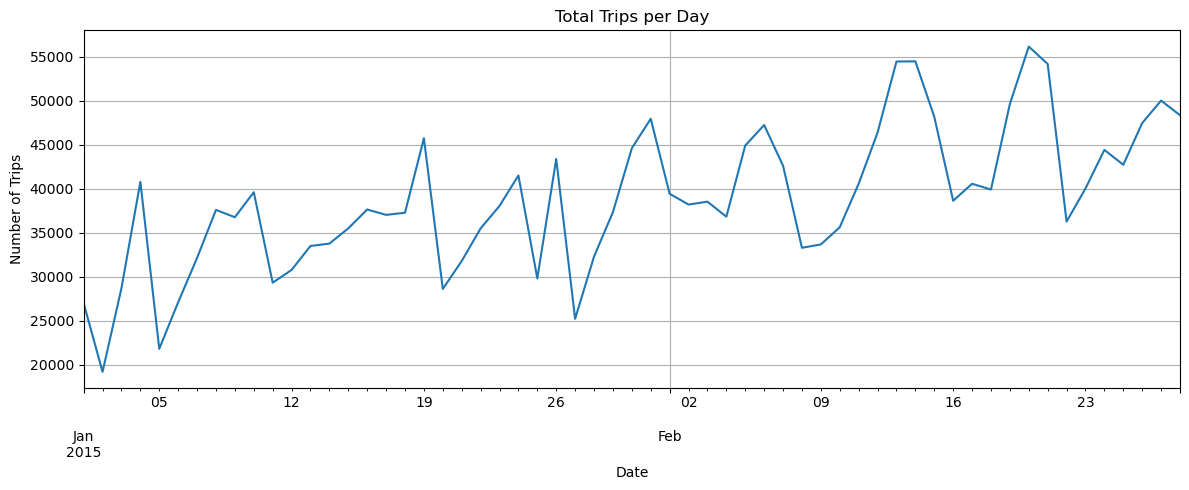

In [22]:
# 1. Total Trips per Day
trips_per_day = df.groupby('date')['trips'].sum()
plt.figure(figsize=(12, 5))
trips_per_day.plot()
plt.title('Total Trips per Day')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.tight_layout()
plt.show()




C:\Users\Chetanya Kumar\AppData\Local\Temp\ipykernel_392\1401275390.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trips_by_base.index, y=trips_by_base.values, palette='viridis')


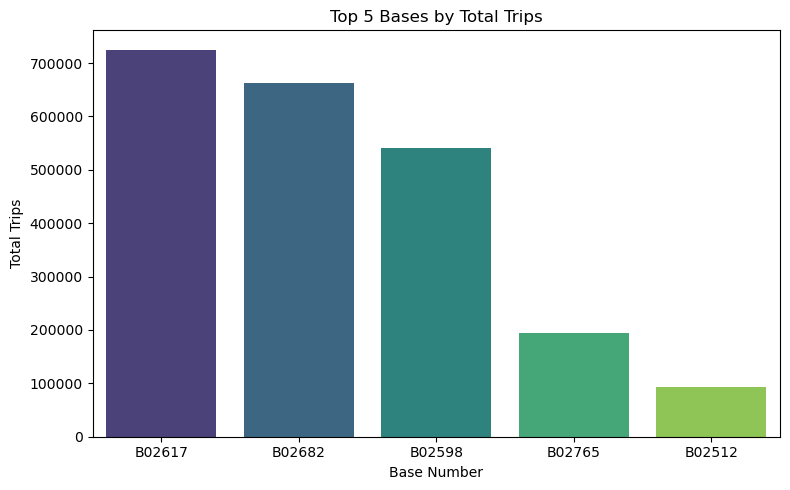

In [23]:
# 2. Top 5 Bases by Total Trips
trips_by_base = df.groupby('dispatching_base_number')['trips'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=trips_by_base.index, y=trips_by_base.values, palette='viridis')
plt.title('Top 5 Bases by Total Trips')
plt.xlabel('Base Number')
plt.ylabel('Total Trips')
plt.tight_layout()
plt.show()


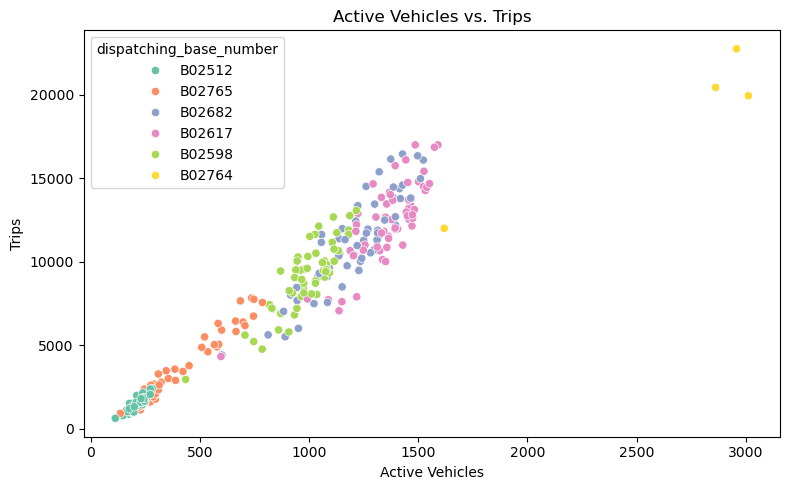

In [24]:
# 3. Scatter Plot: Active Vehicles vs Trips
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='active_vehicles', y='trips', hue='dispatching_base_number', palette='Set2')
plt.title('Active Vehicles vs. Trips')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')
plt.tight_layout()
plt.show()

# Machine Learning

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [48]:
df['date'] = pd.to_datetime(df['date'])

# yeh yha isne jo simple date likhi h na woh oython ki standard form mae covert ki h mtlb mtlb data mae bs ase hi date likhdi string ki form mae python ne use date k standard from mae covert kia taki graphs or prediction krne mae asani ho smj rha h? kya chrr rha h be tu

In [52]:
# Feature Engineering
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df['base_encoded'] = df['dispatching_base_number'].astype('category').cat.codes

In [54]:
# Target Variable: High Trips or Not (1 if above median, else 0)
threshold = df['trips'].median()
df['high_trips'] = (df['trips'] > threshold).astype(int)

In [56]:
# Features and target
X = df[['active_vehicles', 'day', 'month', 'weekday', 'base_encoded']]
y = df['high_trips']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [60]:
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Support Vector Machine": SVC()
}


In [68]:
#Train & Evaluate
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy*100

In [70]:
print("Model Accuracy Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")

Model Accuracy Comparison:
Logistic Regression: 95.0000
Decision Tree: 91.6667
Random Forest: 95.0000
K-Nearest Neighbors: 93.3333
Gaussian Naive Bayes: 93.3333
Support Vector Machine: 93.3333


C:\Users\Chetanya Kumar\AppData\Local\Temp\ipykernel_392\2694701587.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')


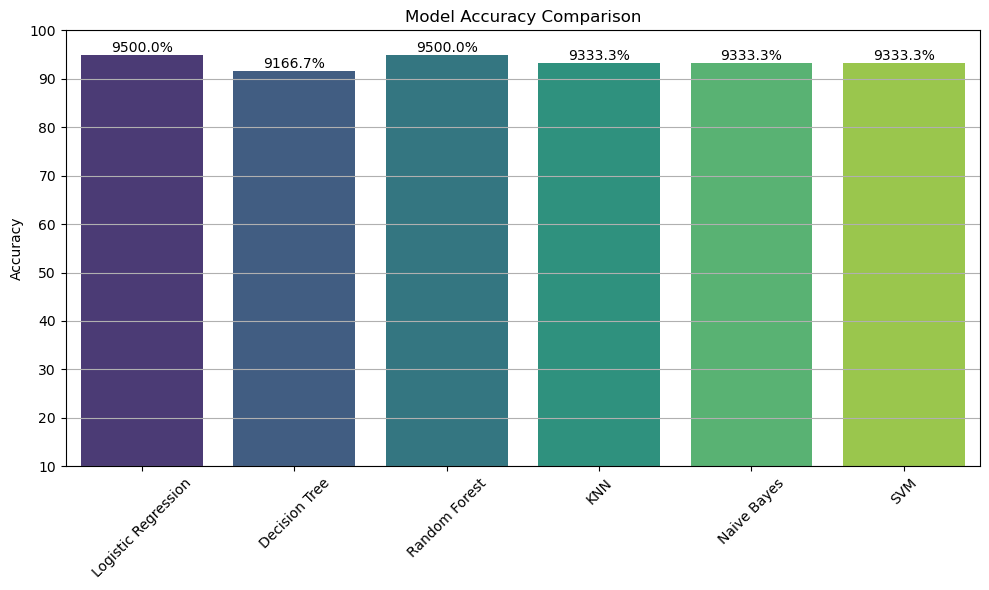

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracy results from your models
results = {
    'Logistic Regression': 95.00,
    'Decision Tree':  91.6667,
    'Random Forest': 95.0000,
    'KNN':  93.3333,
    'Naive Bayes':  93.3333,
    'SVM': 93.3333
}

# Convert to lists for plotting
model_names = list(results.keys())
accuracies = list(results.values())

# Plotting the bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracies, palette='viridis')
plt.ylabel("Accuracy")
plt.ylim(10,100)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding accuracy values on top of each bar in terms of percentage
for p in ax.patches:
    accuracy_percentage = p.get_height() * 100  # Multiply by 100 to convert to percentage
    ax.annotate(f'{accuracy_percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()
